# HW2: Linear Regression

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd '/content/drive/MyDrive/STAT335/hw2/'

Mounted at /content/drive
/content/drive/MyDrive/STAT335/hw2


# Question 1 - House price prediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The meaning of some selected variables.

* id: a notation for a house
* date: the date house was sold
* price: price of the house
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms/bedrooms
* sqftliving: square footage of the home
* zipcode: zip code
* condition: how good the condition is overall. 1 indicates worn out property and 5 excellent.

In [3]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1.1.** How many covariate variables (id and date are not covariate variables)? How many samples?

In [4]:
dataset.shape
#there are 19 covariate variables and 21613 samples

(21613, 21)

**Question 1.2.** Create a new dataframe with the target variable `price` and the following covariates: `bedrooms`, `bathrooms`, `sqft_living`, `zipcode`,`condition`. Convert `price` to be in terms of 1000s of dollars, i.e.  price = price/1000.

In [5]:
#let df be the dataset with only the above covariates
df = dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'condition']]
#divide the price column by 1000
df['price'] = df['price'] / 1000
df

,price,bedrooms,bathrooms,sqft_living,zipcode,condition
0,221.900,3,1.00,1180,98178,3
1,538.000,3,2.25,2570,98125,3
2,180.000,2,1.00,770,98028,3
3,604.000,4,3.00,1960,98136,5
4,510.000,3,2.00,1680,98074,3
...,...,...,...,...,...,...
21608,360.000,3,2.50,1530,98103,3
21609,400.000,4,2.50,2310,98146,3
21610,402.101,2,0.75,1020,98144,3
21611,400.000,3,2.50,1600,98027,3


**Question 1.3.** For each categorical variable, print out the number of categories.

In [6]:
print(df['bedrooms'].nunique())
print(df['bathrooms'].nunique())
print(df['zipcode'].nunique())
print(df['condition'].nunique())

13
30
70
5


**Question 1.4.** Print a covariance matrix between all variables (including price) and create a pair plot (see linear regression notes). State which variable is most correlated with price and which is least correlated.

In [7]:
# covariance
print(df.cov())

                     price    bedrooms   bathrooms    sqft_living  \
price        134782.378397  105.286276  148.481496  236715.431307   
bedrooms        105.286276    0.865015    0.369527     492.596040   
bathrooms       148.481496    0.369527    0.593151     533.811988   
sqft_living  236715.431307  492.596040  533.811988  843533.681368   
zipcode       -1045.071663   -7.597239   -8.400840   -9800.232484   
condition         8.687030    0.017232   -0.062638     -35.114601   

                 zipcode  condition  
price       -1045.071663   8.687030  
bedrooms       -7.597239   0.017232  
bathrooms      -8.400840  -0.062638  
sqft_living -9800.232484 -35.114601  
zipcode      2862.787835   0.105343  
condition       0.105343   0.423467  


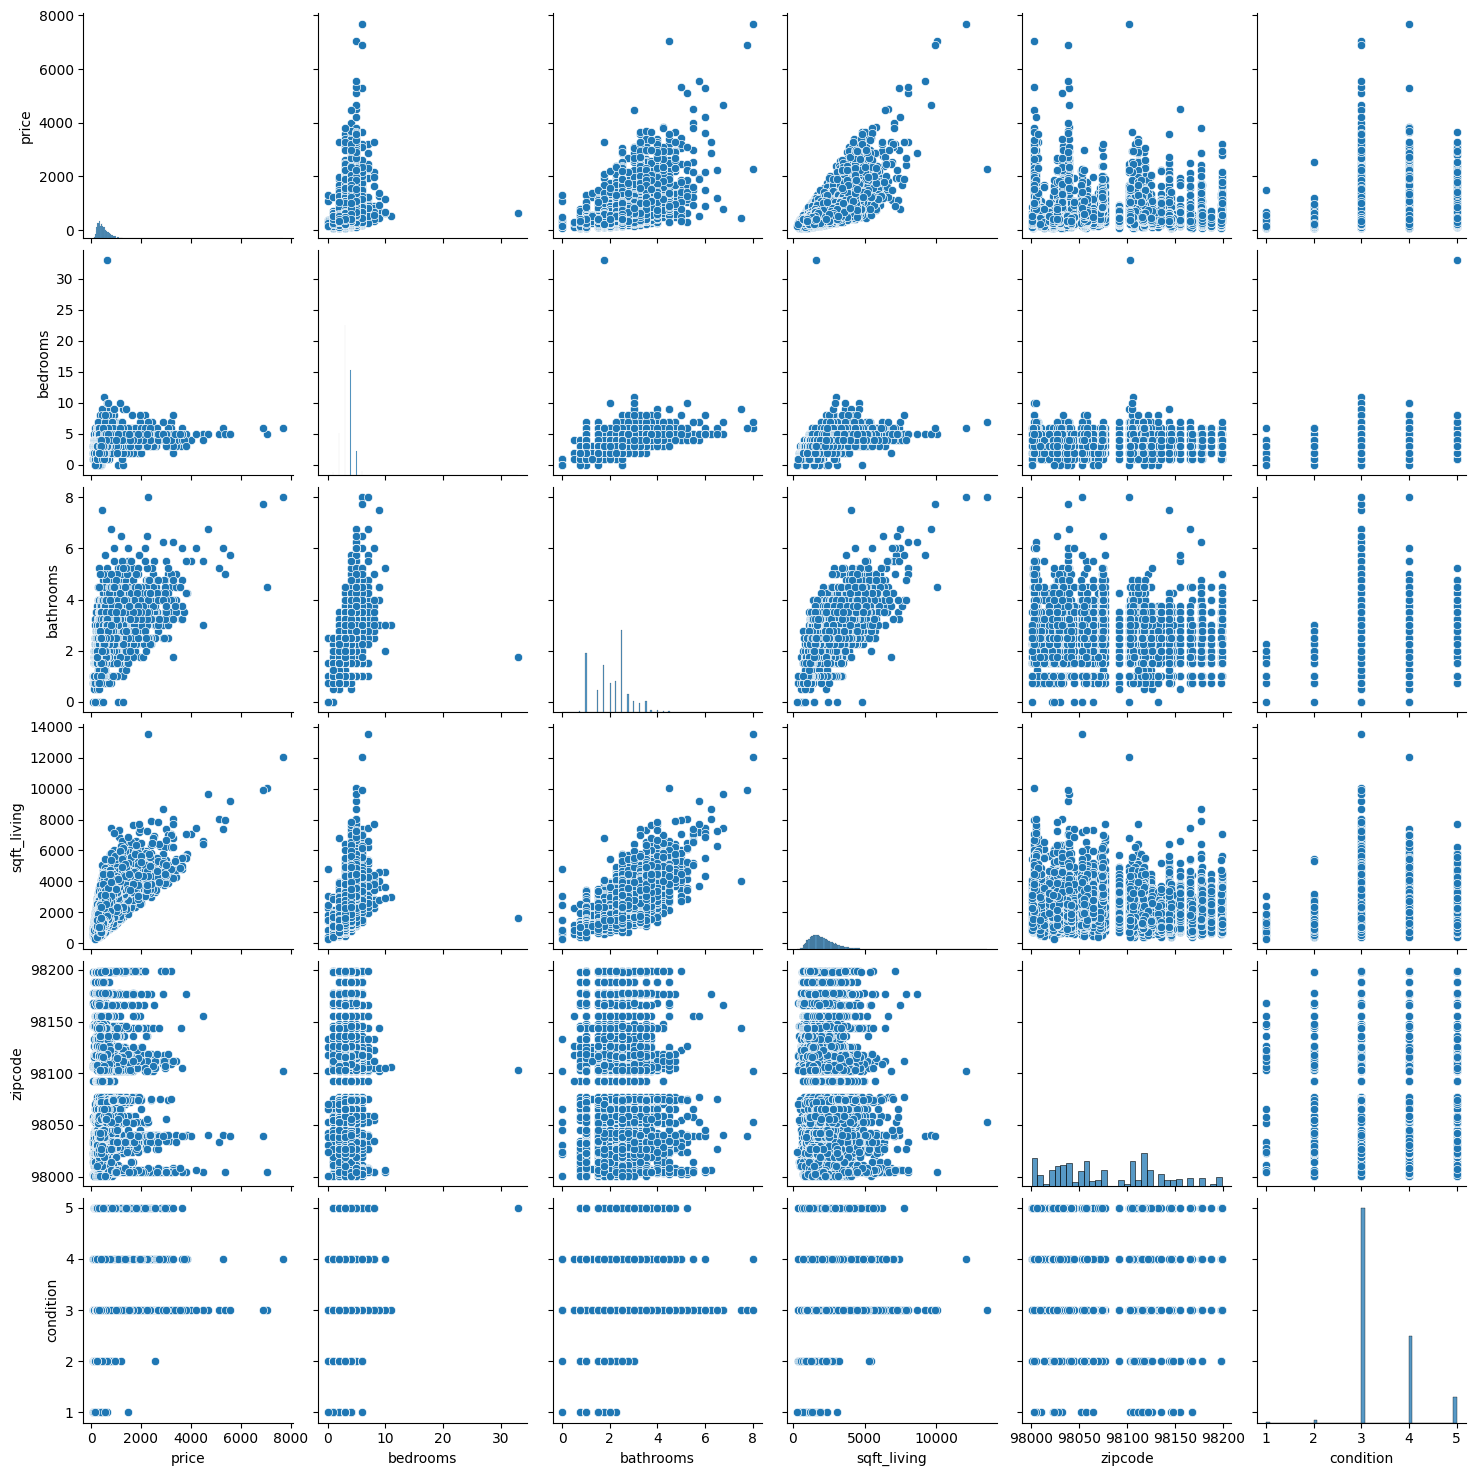

In [8]:
# pair plot
sns.pairplot(df)
plt.show()
#from the pairplot, it seems that bedrooms is most correlated with price, and zipcode is the least correlated.

## Part 1. Simple Linear Regression

Predict `price` using the living area size `sqft_living`

**Question 2.1.** Split your data into a training and testing dataset.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df['sqft_living'], df['price'])
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test)

**Question 2.2.** Use sklearn's `LinearRegression` to obtain the linear regression model.

In [10]:
lm = LinearRegression()
lm.fit(x_train, y_train)

yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)


**Question 2.3.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [11]:

print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

# the model indeed generalized well because the MSE and R^2 values between both are very similar

Train
MSE - 69356.46402988797
R2 -  0.49573591526326133


Test
MSE - 65349.06235629048
R2 -  0.4833118674635841


**Question 2.4.** Use statsmodels `ols` method to obtain the linear regression model with an intercept (check linear regression note). Display the summary statistics below. State if `sqft_living` is significant or not.

In [12]:
x_trainconstant = sm.add_constant(x_train)
est = sm.OLS(y_train, x_trainconstant).fit()

sqft_living is significant because its pvalue is 0.


In [13]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.593e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:51:59   Log-Likelihood:            -1.1334e+05
No. Observations:               16209   AIC:                         2.267e+05
Df Residuals:                   16207   BIC:                         2.267e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.9554      5.091     -9.420      0.0

## Part 2. Multiple regression model

**Question 3.1.** Predict `price` with `bedrooms`, `bathrooms`, and `sqft_living` again using sklearns `LinearRegression`

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df.loc[:,['bedrooms','bathrooms','sqft_living']], df['price'])
x_train1 = np.array(x_train1)
y_train1 = np.array(y_train1)
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1)

lm1 = LinearRegression()
lm1.fit(x_train1, y_train1)

yhat_train1 = lm1.predict(x_train1)
yhat_test1 = lm1.predict(x_test1)

print(yhat_train1)
print(yhat_test1)


[865.74867072 955.05654635 381.78342028 ... 318.35104602 634.37932373
 639.47055079]
[370.20364728 465.61182893 720.5830041  ... 498.93091296 860.8900428
 592.08833754]


**Question 3.2.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion. Also state whether this model improved over the simple linear regression.

In [15]:
print("Train")
print('MSE -', np.mean((y_train1 - yhat_train1)**2))
print('R2 - ', lm1.score(x_train1, y_train1))

print("\n")

print("Test")
print('MSE -', np.mean((y_test1 - yhat_test1)**2))
print('R2 - ', lm1.score(x_test1, y_test1))

#the model generalizes fairly well again because the MSE and R^2 values are similar enough
#this model doesn't improve too much from the simple linear regression but improves nonetheless
#this is because the MSE and R^2 are only marginally better

Train
MSE - 66172.24906137025
R2 -  0.5055397282704401


Test
MSE - 67339.60680746417
R2 -  0.5106836039550449


**Question 3.3.** Use statsmodels `ols` to determine which variables are significant (ignoring issues of multiple testing). Display the summary below and state which variables are significant and why.

In [16]:
x_train1constant = sm.add_constant(x_train1)
est1 = sm.OLS(y_train1, x_train1constant).fit()
print(est1.summary())

#all of the variables are significant
#this is because the pvalues are close enough to zero and the 95 percent confidence intervals do not contain zero

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     5523.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:51:59   Log-Likelihood:            -1.1296e+05
No. Observations:               16209   AIC:                         2.259e+05
Df Residuals:                   16205   BIC:                         2.260e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7452      7.931      9.677      0.0

## Part 3. Regress on zip code

**Question 4.1.** The zipcode is a nominal variable whose values are represented by numbers. In this section, we want to divide the county into two parts based on zipcode. Create a new column named `area`. If the `zipcode` is no more than 98100, its area = 0; If the `zipcode` is larger than 98100, we let area = 1.  

In [17]:
def ziptoarea(x):
  if x > 98100:
    return 1
  elif x < 98100:
    return 0
df['area'] = df['zipcode'].map(ziptoarea)

**Question 4.2.** Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [18]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df.loc[:,['area']], df['price'])
x_train2 = np.array(x_train2)
y_train2 = np.array(y_train2)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

lm2 = LinearRegression()
lm2.fit(x_train2, y_train2)

yhat_train2 = lm2.predict(x_train2)
yhat_test2 = lm2.predict(x_test2)

print("Train")
print('MSE -', np.mean((y_train2 - yhat_train2)**2))
print('R2 - ', lm2.score(x_train2, y_train2))

print("\n")

print("Test")
print('MSE -', np.mean((y_test2 - yhat_test2)**2))
print('R2 - ', lm2.score(x_test2, y_test2))
#the model generalized well between datasets because it behaved consistently and the mse and r2 between sets is close

Train
MSE - 138648.30803478954
R2 -  5.038576295457453e-05


Test
MSE - 123107.70652174127
R2 -  4.0552085158296336e-05


**Question 4.3.** We want to refine the area, so we divide the county into four parts based on zipcode. Create a new column named `area2`. area2 = 0 if zipcode <= 98050; area2 = 1 if 98050 < zipcode <=98100; area3 = 2 if 98100 < zipcode <=98150; area2 = 3 if zipcode > 98150.

In [19]:
def refineArea(x):
  if x <= 98050:
    return 0
  elif x > 98050 and x <= 98100:
    return 1
  elif x > 98100 and x <= 98150:
    return 2
  elif x > 98150:
    return 3

df['area2'] = df['zipcode'].map(refineArea)
df.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition,area,area2
0,221.9,3,1.00,1180,98178,3,1,3
1,538.0,3,2.25,2570,98125,3,1,2
2,180.0,2,1.00,770,98028,3,0,0
3,604.0,4,3.00,1960,98136,5,1,2
4,510.0,3,2.00,1680,98074,3,0,1


**Question 4.4.**  Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [20]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df.loc[:,['area2']], df['price'])
x_train3 = np.array(x_train3)
y_train3 = np.array(y_train3)
x_test3 = np.array(x_test3)
y_test3 = np.array(y_test3)

lm3 = LinearRegression()
lm3.fit(x_train3, y_train3)

yhat_train3 = lm3.predict(x_train3)
yhat_test3 = lm3.predict(x_test3)

print("Train")
print('MSE -', np.mean((y_train3 - yhat_train3)**2))
print('R2 - ', lm3.score(x_train3, y_train3))

print("\n")

print("Test")
print('MSE -', np.mean((y_test3 - yhat_test3)**2))
print('R2 - ', lm3.score(x_test3, y_test3))
#this model also generalized reasonably well as the mse is close and the r2 is somewhat close

Train
MSE - 130866.83708017593
R2 -  0.0009778452398468973


Test
MSE - 145872.16742731814
R2 -  0.0015895534336746175


## Part 4. Build a full model

Lets put our data science skills to the test.

1. Use the variables in the original dataset (except date and ID) to predict `price/1000`
2. You cannot use price to predict price.
3. Otherwise you can use any variable or interaction that you want. Decide whether variables need to be encoded as categories or treated continuously.

**Question 5.1.** Create training and testing dataset with `test_size=0.33` and `random_state=42`.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

In [21]:
dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id', 'date'], axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in cols:
  print(f'{col}: {dataset[col].nunique()}')

bedrooms: 13
bathrooms: 30
sqft_living: 1038
sqft_lot: 9782
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5034
long: 752
sqft_living15: 777
sqft_lot15: 8689


In [100]:
from sklearn.preprocessing import OneHotEncoder


y = dataset.loc[:,['price']] / 1000
features = dataset.drop('price', axis=1)
# sns.pairplot(features)
# plt.show()
features['area2'] = features['zipcode'].map(refineArea)
# predict price/1000

# select continuous features
x_cont = features.loc[:,['sqft_living', 'sqft_lot', 'sqft_above','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15','lat']]

# encode categorical features
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_cat =(features.loc[:,['bedrooms','floors','condition','waterfront', 'view', 'grade','zipcode']])
enc.fit(x_cat)
x_cat = enc.transform(x_cat)

# create interaction features
features['bedrooms_sqft_lot'] = features['bedrooms'] * features['sqft_lot']
features['bathrooms_sqft_living'] = features['bathrooms'] * features['sqft_living']
features['bathrooms_grade'] = features['bathrooms'] * features['grade']
features['yr_renovated_area2'] = features['yr_renovated'] * features['area2']
features['area2_sqft_living15'] = features['area2'] * features['sqft_living15']
features['sqft_above_sqft_living'] = features['sqft_above'] * features['sqft_living']
features['area2_lat'] = features['area2'] * features['lat']
features['area2_long'] = features['area2'] * features['long']
#features['bathrooms_sqft_lot'] = features['bathrooms'] * features['sqft_lot']

x_inter = features.loc[:,['bedrooms_sqft_lot', 'bathrooms_grade', 'yr_renovated_area2','bathrooms_sqft_living', 'area2_sqft_living15','sqft_above_sqft_living', 'area2_lat', 'area2_long']]
# concatenate all features into a single covariate array x
x = np.concatenate([x_cont, x_cat,x_inter], axis=1)
print(x.shape)


# you must use this split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.33, random_state=42)
#x_train4, x_test4, y_train4, y_test4 = train_test_split(dataset.loc[:,dataset.columns != 'price'], y, test_size=0.33, random_state=42)

(21613, 129)


**Question 5.2.** Using all of the covariates develop a linear model that achieves a test MSE $ < 30000$ and a test R2 > 0.8.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

- There are many possible answers here (and it is definitely possible)

- I found `zipcode` very helpful. You will likely need interactions.

Print the test MSE and test R2

In [101]:
x_train4 = np.array(x_train4)
y_train4 = np.array(y_train4)
x_test4 = np.array(x_test4)
y_test4 = np.array(y_test4)

lm4 = LinearRegression()
lm4.fit(x_train4, y_train4)

yhat_train4 = lm4.predict(x_train4)
yhat_test4 = lm4.predict(x_test4)
print("Train")
print('MSE -', np.mean((y_train4 - yhat_train4)**2))
print('R2 - ', lm4.score(x_train4, y_train4))

print("\n")

print("Test")
print('MSE -', np.mean((y_test4 - yhat_test4)**2))
print('R2 - ', lm4.score(x_test4, y_test4))

Train
MSE - 18439.959700656327
R2 -  0.8552514151470112


Test
MSE - 26633.532492538663
R2 -  0.822124569404995


In [102]:
x_train4constant = sm.add_constant(x_train4)
est4 = sm.OLS(y_train4, x_train4constant).fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     701.1
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:27:14   Log-Likelihood:                -91660.
No. Observations:               14480   AIC:                         1.836e+05
Df Residuals:                   14358   BIC:                         1.845e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1571.2119   3452.191     -0.455      0.6

**Question 5.3.** Describe the model you built and use statsmodels to determine which variables were the most important for your model

In [24]:
#I built the model by using continuous, categorical, and interaction variables
# I started with all of them and then used stats models to take out variable from my model with high p values
# I then used pairplots to create interaction variable between highly correlated features
#my model does not process the zip codes when used as a categorical variable, but it does when used in interactions

# 'bedrooms_sqft_lot', 'bathrooms_grade' were the most impactful variable for my model as they had the highest absolute t value, x122 and x123 respectively


# Question 2 - Consistency in estimating $\beta$s

Now, we will investigate some statistical properties of linear regression. We will show that
1. Parameter estimates tend to improve with more data
2. A linear model is unbiased when the data are truly linear
3. Estimation variance decreases with increasing sample size

Unlike in question 1, where data are provided, this question will involve simulating our own data. We do this so that we can check statistical properties through repeated simulation. Our interest is in uncovering properties of the linear model that hold up across many different datasets.




In [25]:
from sklearn.linear_model import LinearRegression

## Part 1. Consistency of the betas

Suppose we observe (or generate) some data that is truly a linear combination of $p$ features. That is $y$, is in actuality generated by an (unknown) linear combination of $x_1$, $x_2$, ..., $x_p$ plus error. We can write any observation $y_i$ as
$$
y_i = x_{i, 1} \beta_1 + x_{i, 2} \beta_2 + ... x_{i, p} \beta_p + \epsilon
$$
where $x_{i, 1}$ means the $i$th observation of variable $x_1$,  $x_{i, 2}$ means the $i$th observation of variable $x_2$, and so on and so forth. If $Y = [y_1,...,y_n]$ is a column of $n$ targets, $X$ is data matrix with $n$ rows and $p$ columns, $\beta = [\beta_1,...,\beta_p]$ is our coefficient vector, then we can write this in shorthand as
$$
Y = X \beta + \epsilon
$$
where $X$ is an $n \times p$ matrix containing the $n$ observations of $x_1, x_2,\ldots, x_p$ as column vectors. This represents the above equation applied to every observation in $i = 1,2,...,n$.
 - _Note that $X \beta$ can be computed in python as_ `x @ beta`.

Suppose we fit a linear model to data that is truly generated by a linear combination of the features and estimate our coefficient matrix $\hat{\beta}$. A natural question to ask is how accurate is $\hat{\beta}$? I.e., does $\hat \beta$ approximate $\beta$ well? We will use simulation to show that this is the case.




1. Run the following code to generate __one__ example dataset. This is simply for you to see what the data are supposed to look like.

2. Write a loop that does the following 1000 times
  - Generates an (x, y) pair like the example code (use $n = 100$)
  - Fits a linear model from x to y
  - saves the estimated beta vector from the linear model

3. Save all of your estimated betas in a `(1000, 4)` array called `beta_hat`

4. Plot individual histogram of each estimated beta (i.e. a histogram of each column). Include a black vertical line at the true value of beta. Do the histograms roughly center at the vertical line?

5. Repeat steps 2-4 with $n = 2000$. Compare the histograms of the estimated betas when $n = 2000$ vs when $n=100$. What do you notice about the spread of the estimated betas when the sample size is much higher?

In [26]:
# these are the actual beta values that are used to generate the data
# we will compare our estimated values to these
true_beta = np.array([1, 2, -1, 0])

# number of features
p = true_beta.shape[0]

# sample size
n = 100

# generate "data" from a standard normal with n rows and p columns
x = np.random.normal(0, 1, [n, p])
y = x @ true_beta + np.random.normal(0, 1, [n])

In [27]:
beta_hat = np.zeros((1000,4))
for i in range(1000):
  x = np.random.normal(0,1,[n,p])
  y = x @ true_beta + np.random.normal(0,1,[n])
  lm1 = LinearRegression().fit(x,y)
  beta_hat[i] = lm1.coef_


In [28]:
beta_hat

array([[ 1.04223619,  1.79133271, -0.955337  , -0.03585515],
       [ 1.01299533,  2.00712026, -0.67890431, -0.03069605],
       [ 0.94923897,  2.00041259, -0.97128187,  0.07725214],
       ...,
       [ 0.91430819,  2.04235795, -0.99134254,  0.04396241],
       [ 1.01356849,  1.91232924, -1.01715703, -0.04168631],
       [ 0.89369275,  1.9229464 , -1.03881637, -0.10810786]])

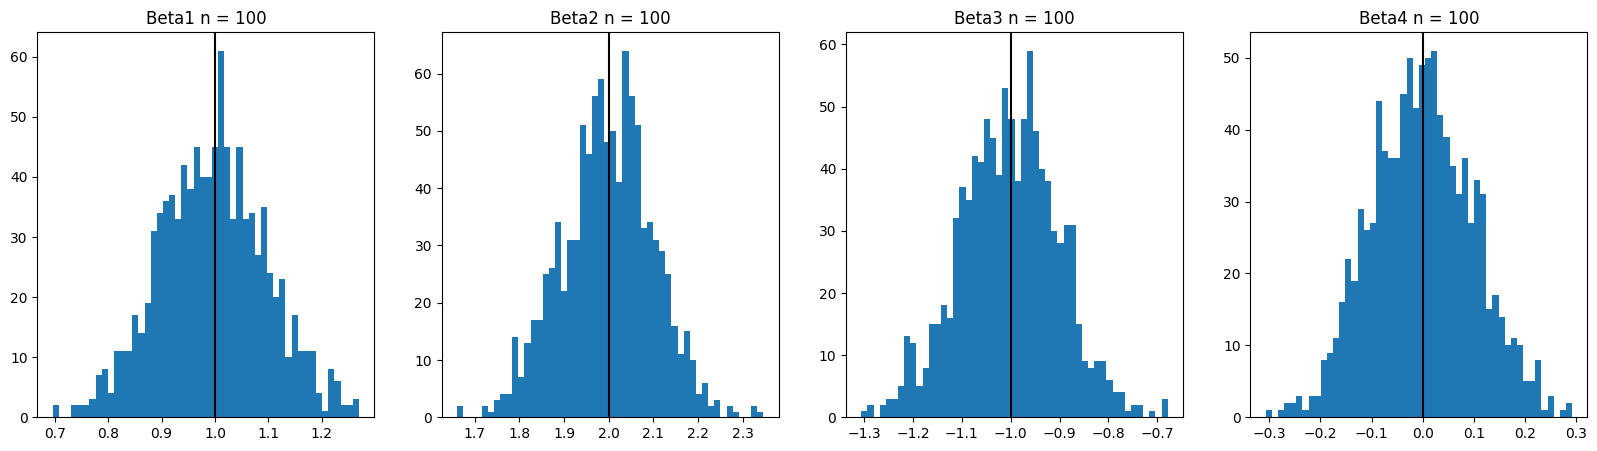

In [29]:
#final output should look similar to this for n=100
fig1, axs1 = plt.subplots(1,p ,figsize = (20,5))
for i in range(p):
  axs1[i].hist(beta_hat[:,i], bins = 50)
  axs1[i].axvline(true_beta[i], color = 'black')
  axs1[i].set_title(f'Beta{i+1} n = 100')


In [30]:
beta_hat1 = np.zeros((1000,4))
for i in range(1000):
  x = np.random.normal(0,1,[2000,p])
  y = x @ true_beta + np.random.normal(0,1,[2000])
  lm2 = LinearRegression().fit(x,y)
  beta_hat1[i] = lm2.coef_


In [31]:
beta_hat1

array([[ 0.98983856,  2.01330689, -1.00121952,  0.03170978],
       [ 1.00788965,  2.02888933, -1.03351532, -0.01997108],
       [ 0.98173816,  1.99638892, -1.02297657,  0.0151383 ],
       ...,
       [ 0.96008041,  1.99078881, -1.01317065,  0.01386046],
       [ 1.00880029,  2.02331909, -0.98456534,  0.00726867],
       [ 0.96251838,  1.96037264, -1.0171884 ,  0.0201774 ]])

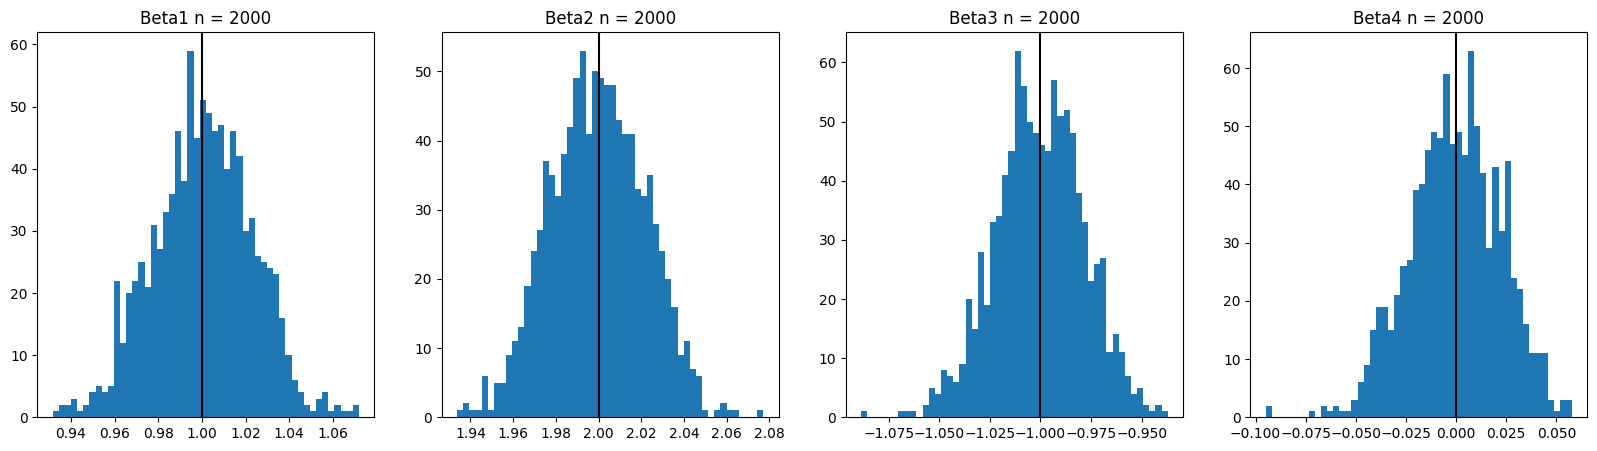

In [32]:
#final output should look similar to this for n=2000
fig2, axs2 = plt.subplots(1,p, figsize = (20,5))
for i in range(p):
  axs2[i].hist(beta_hat1[:,i], bins = 50)
  axs2[i].axvline(true_beta[i], color = 'black')
  axs2[i].set_title(f'Beta{i+1} n = 2000')

#it may be hard to tell with less bins, but the general trend is with more samples,
#the estimated betas tend towards the true beta

## Part 2. Mean and variance of the parameters

1. Print the mean estimated beta from each simulation study. How closely do these match the true beta vector we generated the data with?

2. Print the variance of the estimated betas from each simluation study. Is the variance increasing or decreasing with sample size (n=100 vs. n=2000)?

In [33]:
# mean
print("Estimated Beta means for n = 100 \n")
print(beta_hat[:,0].mean(), beta_hat[:,1].mean(), beta_hat[:,2].mean(), beta_hat[:,3].mean(), "\n")

print("Estimated Beta means for n = 2000 \n")
print(beta_hat1[:,0].mean(), beta_hat1[:,1].mean(), beta_hat1[:,2].mean(), beta_hat1[:,3].mean())

#the mean estimated betas for n = 100 are very close to the true betas
#if we were to round from the thousandths places, we would get the true betas

#however, for the estimated betas for n = 2000, we are even closer
#if we were to round from the ten thousandths places, we would get the true betas

#this means we got more and more close to the true beta as sample size goes up

Estimated Beta means for n = 100 

0.9959314248264538 1.9979287079161985 -1.0032295279168602 -0.0006345903810974258 

Estimated Beta means for n = 2000 

1.0006174108261672 1.9996566687967054 -1.000498043757136 -0.0005290851413984741


In [34]:
# variances
print("Estimated Beta variances for n = 100 \n")
print(beta_hat[:,0].var(),beta_hat[:,1].var(),beta_hat[:,2].var(),beta_hat[:,3].var(), "\n")

print("Estimated Beta variances for n = 2000 \n")
print(beta_hat1[:,0].var(), beta_hat1[:,1].var(),beta_hat1[:,2].var(),beta_hat1[:,3].var())

#the variance is decreasing as we have higher samples
#as variances get closer and closer to zero that means we have a more accurate
#depiction of the true values.

Estimated Beta variances for n = 100 

0.009910694410692984 0.010403233893166714 0.01009076868540702 0.009866148240237864 

Estimated Beta variances for n = 2000 

0.0005149558382191558 0.00048673048937966743 0.00047431502539355954 0.0005083434880235202


# Question 3 - Multicollinearity

In the above problem, we generated all our features _independently_. That is, $x_1$ has no influence on $x_2$, $x_2$ has no influence on $x_3$, etc. When this _assumption_ holds we saw that the betas were estimated really well!

What happens if the features are not independent?

__Multicollinearity__ is a situation where one predictor can be written as a linear combination of the other predictors. For example, if $x_2 = 0.5 x_1$ then we would say that $x_1$ and $x_2$ are collinear. Another example, if $x_3 = x_1 + x_2$ then
$x_1$, $x_2$, and $x_3$ are all collinear with each other. In general, we can see that there is some redundant information being included in the model. If $x_3 = x_1 + x_2$, then $x_3$ isn't providing any information over what $x_1$ and $x_2$ already tell us for a linear model.

Is this redundancy harmless? No.

Multicollinearity can be a big issue for _training_ models and _interpreting_ their coefficients. Lets see why.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.


2. Stack these variables into a single data matrix `x` (should have 1000 rows and 3 columns).

3. Compute `y = x @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

4. Create a `1x3` array of scatter plots showing `y` vs each covariate.


In [36]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2
x = np.stack([x1, x2, x3], axis = 1)
beta = np.array([1, 1, 1])

np.random.seed(0)
y = x @ beta + np.random.normal(0, 1, n)

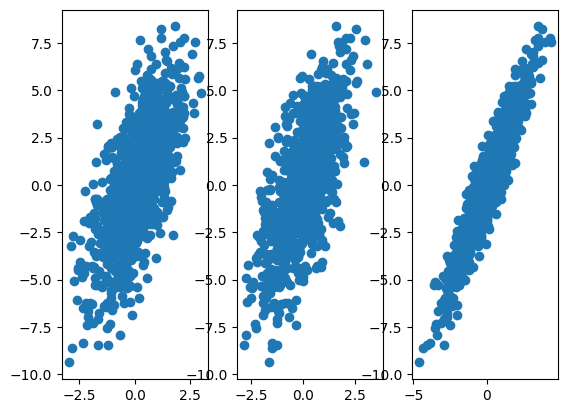

In [37]:
fig3, axs3 = plt.subplots(1, 3)

axs3[0].scatter(x1, y)
axs3[1].scatter(x2, y)
axs3[2].scatter(x3, y)

## Part 2. Check Linear model fit

1. Split the data into training and testing sets. Use a test size of 0.33 and a random state of 42.

2. Fit a linear regression on the training data

3. Print the estimated coefficients and the MSE on the testing data
  - if the estimated coefficients are close to infinity, re-generate the data until you have finite numbers
  - should be between 0 and 2

4. Comment: Are these estimated coefficients close to the true coefficients?

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [39]:
lm = LinearRegression().fit(x_train,y_train)


In [40]:
yhat_test = lm.predict(x_test)
print("Estimated coefficients: ",lm.coef_)
print("Test MSE: ", np.mean((y_test - yhat_test)**2))

#the coefficients are not close to the true coefficients

Estimated coefficients:  [0.68027635 0.65139626 1.33167261]
Test MSE:  1.0226412406501078


## Part 3. Compare with reduced model

1. Create a new data matrix `x_reduced` that consists of only `x1` and `x2`.

2. Compute `y_reduced = x_reduced @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

3. Split the data into training and testing datasets again using a test size of 0.33 and a random state of 42

4. Fit a linear model, print the coefficients and the test MSE

5. Comment: Are these model coefficients different from before? How does the test MSE compare to the previous model? Summarize the impact of multicollinearity on this model in terms of coefficient estimation and prediction error.

In [41]:
x_reduced = np.stack([x1, x2], axis = 1)
beta = np.array([1, 1])

np.random.seed(0)
y_reduced = x_reduced @ beta + np.random.normal(0, 1, n)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced,y_reduced, test_size = 0.33, random_state = 42)

In [43]:
lm = LinearRegression().fit(x_train,y_train)

In [44]:
yhat_test = lm.predict(x_test)
print("Estimated coefficients: ",lm.coef_)
print("Test MSE: ", np.mean((y_test - yhat_test)**2))

#Yes, the model coefficients are different than before. The test MSE is exactly the same as before
#Multicollinearity on this model makes the coefficient estimates less reliable. We can see this when
#our estimated coefficients for the full model were off by almost 50%. Because our MSE is exactly the same
#it can be hard to tell if theres multicollinearity present.


Estimated coefficients:  [1.01194897 0.98306887]
Test MSE:  1.0226412406501078


## Part 4. Checking for multicollinearity

How can we check if multicollinearity is occuring? We can see that in some sense multicollinearity may not matter, but in others it matters a great deal! There are many methods that have been developed to test for multicollinearity in a dataset. We will use the simplest approach which is a simple eyeball test.

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.

2. Create a 1x3 panel of plots showing each covariate plotted against the others. Comment: What do you notice about these plots? What do they show us about the correlation between variables?

3. Print the correlation coefficient for each variable combination. Which variables are highly correlated?


_Note: more sophisticated approaches involve inspecting variance inflation factors_ https://online.stat.psu.edu/stat462/node/180/

In [45]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2
x = np.stack([x1, x2, x3], axis = 1)

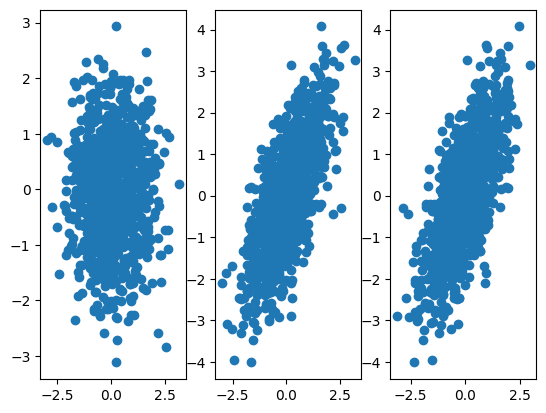

In [46]:
fig4, axs4 = plt.subplots(1,3)
axs4[0].scatter(x1, x2)
axs4[1].scatter(x1, x3)
axs4[2].scatter(x2, x3)

#the points on the plots are compact together and they seem to be linearly correlated

In [47]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)
def sample_corr(x,y):
            corr = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y))
            corr = corr/(len(x)*np.std(x)*np.std(y))
            return corr

z1 = standard_units(x1)
z2 = standard_units(x2)
z3 = standard_units(x3)

print(sample_corr(z1,z2))
print(sample_corr(z1,z3))
print(sample_corr(z2,z3))

#variables x1 and x3 are correlated , as well as x2 and x3
#there is almost no correlation between x1 and x2
#this makes sense because x1 and x2 are completely separately normally distributed
#meanwhile x3 is a linear combination of x1 and x2


-0.0006454343788655539
0.7120302729942016
0.7016890514606349


# Question 4 - High Dimensional regression

In question 3, we saw how linear regression can go wrong if there is severe collinearity between variables.

Many regression problems assume that the number of predictors $p$ is smaller than the number of samples $n$. What happens if $p > n$?

In [48]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n = 100` samples from `p = 200` independent standard normals (hint: you can do this with a single call to `np.random.normal()`) to get an $n \times p$ data matrix called `x`.

2. Compute the response `y` with the provided beta vector `beta` as `y = x @ beta + np.random.normal(0, 1, n)`

3. Fit a linear regression and plot a histogram of the coefficients. Comment: Do these coefficients center around the true `beta`s (all 1s)?

In [49]:
p = 200
x = np.random.normal(0, 1, [100, p])
beta = np.ones(p)
y = x @ beta + np.random.normal(0, 1, 100)

(array([ 1.,  0.,  1.,  2.,  2.,  2.,  4.,  6.,  9., 16.,  4., 11., 19.,
        22., 21., 10.,  9., 12., 15., 10.,  8.,  6.,  2.,  2.,  1.,  2.,
         1.,  1.,  0.,  1.]),
 array([-0.91912796, -0.81739082, -0.71565368, -0.61391654, -0.5121794 ,
        -0.41044227, -0.30870513, -0.20696799, -0.10523085, -0.00349371,
         0.09824343,  0.19998056,  0.3017177 ,  0.40345484,  0.50519198,
         0.60692912,  0.70866625,  0.81040339,  0.91214053,  1.01387767,
         1.11561481,  1.21735194,  1.31908908,  1.42082622,  1.52256336,
         1.6243005 ,  1.72603763,  1.82777477,  1.92951191,  2.03124905,
         2.13298619]),
 <BarContainer object of 30 artists>)

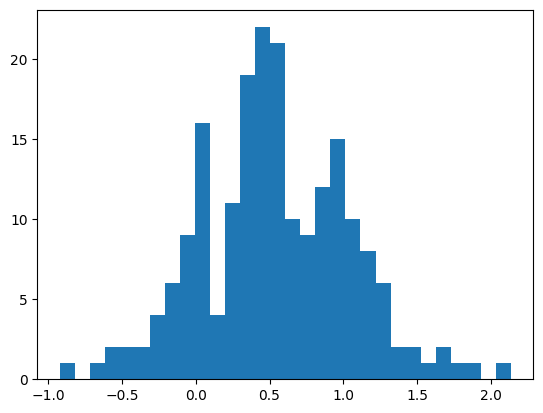

In [50]:
lm = LinearRegression().fit(x,y)
plt.hist(lm.coef_, bins = 30)
#NO, the plotted histogram of coefficients do not center around 1

In [51]:
#histogram should look similar to this

## Part 2. Repeat with even higher dimensional data

Repeat the above with `p = 1000` now. Plot the estimated beta distribution (histogram) from the first model (where `p = 200`) against the new beta distribution (histogram). Comment: What is the difference in the two distributions?

(array([  1.,   1.,   2.,   2.,   0.,   5.,   9.,  21.,  30.,  32.,  38.,
         56.,  63.,  75.,  81., 104.,  75.,  76.,  61.,  71.,  51.,  47.,
         31.,  33.,  12.,  11.,   4.,   1.,   1.,   6.]),
 array([-0.87989539, -0.81987659, -0.75985779, -0.69983899, -0.63982019,
        -0.57980139, -0.51978259, -0.45976378, -0.39974498, -0.33972618,
        -0.27970738, -0.21968858, -0.15966978, -0.09965098, -0.03963218,
         0.02038662,  0.08040542,  0.14042422,  0.20044303,  0.26046183,
         0.32048063,  0.38049943,  0.44051823,  0.50053703,  0.56055583,
         0.62057463,  0.68059343,  0.74061223,  0.80063104,  0.86064984,
         0.92066864]),
 <BarContainer object of 30 artists>)

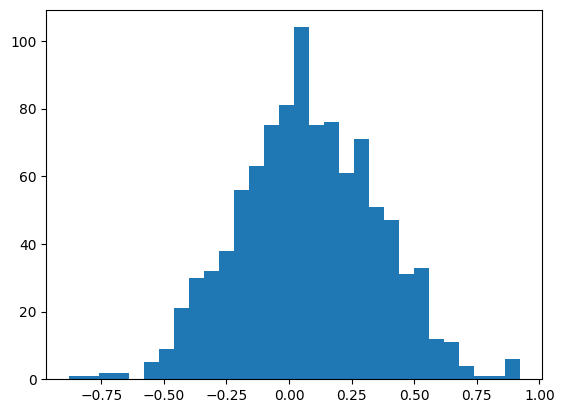

In [52]:
p = 1000
x = np.random.normal(0, 1, [100, p])
beta = np.ones(p)
y = x @ beta + np.random.normal(0, 1, 100)

lm = LinearRegression().fit(x,y)
plt.hist(lm.coef_, bins = 30)

#with a higher amount of independent standard normals, we get a histogram of
#estimated coefficients closer to zero

## Part 3. Apply Lasso

In class we mentioned that regularized regression models like Ridge and Lasso can improve estimation when $p > n$.

1. Comment: Why will Lasso probably not help here?

2. Rerun the above model (with `p = 1000`) using Lasso instead of LinearRegression anyways. Plot the estimated coefficient distribution and compare with the LinearRegression model. You must choose your own regularization parameter.


(array([  3.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   1.,   4.,
        931.,   8.,   7.,   5.,   5.,   3.,   6.,   7.,   2.,   3.,   4.,
          1.,   1.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([-2.69193133, -2.45678563, -2.22163992, -1.98649422, -1.75134852,
        -1.51620281, -1.28105711, -1.04591141, -0.8107657 , -0.57562   ,
        -0.3404743 , -0.1053286 ,  0.12981711,  0.36496281,  0.60010851,
         0.83525422,  1.07039992,  1.30554562,  1.54069133,  1.77583703,
         2.01098273,  2.24612843,  2.48127414,  2.71641984,  2.95156554,
         3.18671125,  3.42185695,  3.65700265,  3.89214836,  4.12729406,
         4.36243976]),
 <BarContainer object of 30 artists>)

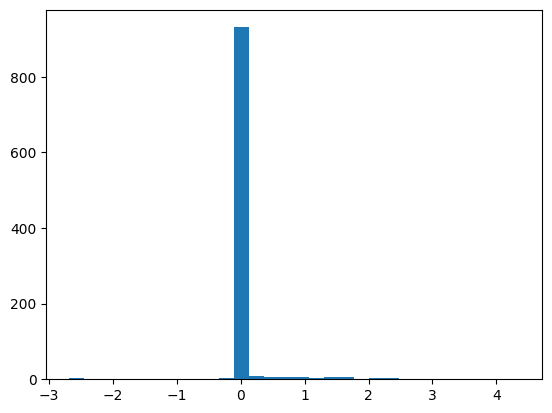

In [53]:
#lasso will probably not help here because lasso chooses coefficients to be zero, but
#the majority of the coefficients are right around 0.5, so its hard to choose which
#coefficients to keep with lasso


lm_lasso = Lasso().fit(x,y)
plt.hist(lm_lasso.coef_, bins = 30)

## Part 4. Sparse regression

Lets look at situation where Lasso can help and compare against linear regression. We will generate a sparse coefficient vector, that is a `beta` vector where most of the entries are 0. In situations like this, Lasso and Ridge can help identify variables that have a coefficient of 0 (i.e. they are unimportant).

1. Generate a random "data matrix" drawn from a standard normal, which has $n = 100$ rows and $p = 1000$ columns.

2. Use the provided sparse `beta` vector to compute `y` from `x`.

3. Fit Lasso with a regularization parameter between $0.5$ and $1.5$. Which coefficients were identified as 0 and none 0? Are the correct coefficients identified? How does this change as you increase or decrease the penalization parameter?

In [54]:
p = 1000
x = np.random.normal(0, 1, [100, p])
beta = np.concatenate([np.ones(5), np.zeros(p-5)])
y = x @ beta + np.random.normal(0, 1, 100)

In [55]:
lm = LinearRegression().fit(x,y)

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lm_lasso = Lasso(alpha = 1).fit(x,y)

In [58]:
coefficients = np.array(lm_lasso.coef_)
coefficientindex = lm_lasso.coef_.nonzero()
for i in coefficientindex:
  print(coefficients[i])


[0.23887167 0.36233757 0.1615317  0.281103   0.18600681]


In [59]:
#we can clearly see that the linear regression model has an extreme amount of more than likely unwanted
#coefficients. Lasso does a good job at removing coefficients.

# Question 5 - Optimize your own model

So far we have used sklearn to fit models for us. Let make sure we have some idea of what its doing. We will write our own model and loss functions then use scipys optimization procedures to find the optimal model.

We will demonstrate this on the diabetes dataset, which has been imported below.




In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes(as_frame=True)
x, y = diabetes.data, diabetes.target
y -= np.mean(y)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Part 1. Check sklearn's solution

1. Fit a linear regression model using sklearn to the training data
2. Compute and print the train and test MSEs
3. Print the estimated beta coefficients
4. Comment: Does this model do a good job extrapolating from train to test?

In [62]:
lm = LinearRegression().fit(x_train,y_train)

In [63]:
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)
print("Training MSE: ", np.mean((y_train - yhat_train)) ** 2)
print("Testing MSE: ", np.mean((y_test - yhat_test) ** 2))

Training MSE:  1.9508893211952208e-29
Testing MSE:  2817.808297221584


In [64]:
lm.coef_

array([  32.14928032, -242.82449076,  559.98996952,  407.63766881,
       -718.69857577,  396.63703933,   10.432395  ,  171.81955335,
        627.07993787,  -21.62312454])

In [65]:
#the linear model for this data set does a terrible job because we have a low MSE
#for the training set, but a high MSE for the test. This means the linear model does a poor job
#at generalizing

## Part 2. Write a model function

If `beta` is a length `p` vector and `x` is an `n x p` matrix, then we can compute `yhat = x @ beta` to estimate `y`.

1. Write a function called `model` that takes a data matrix `x` and a parameter vector `beta` and returns `yhat`.
2. Check that it works by feeding it `xtest` and the beta coefficients sklearn estimated. Check that the predictions of your function match those of `lm.predict()`

In [66]:
def model(x, beta):
  yhat = x @ beta
  return yhat

In [67]:
print(model(np.array(x_test), np.array(lm.coef_)), "\n\n", lm.predict(x_test))

[ -11.34622668   34.30468834  -18.82447973  134.47541802  -27.78487635
  -60.31790861  106.87391358   28.72809241  -68.83212085  -40.5259645
  -54.49730579   18.4325351   -89.36800596   52.11074979  -54.76649263
  -20.91302161   60.96345548   96.61150375   51.41180195   67.8610982
   54.31032649  -61.18710832  -84.69395425   39.33126137    6.57698419
   13.65608923   45.46012104   34.01274402 -103.25586952  -42.07360102
   24.7888687   -60.72596088  -22.75333889   31.14170429   17.97071165
   45.20330794  -30.41609195  -34.921255    -10.64906655  -90.93010911
  -83.28600807  -41.76876935   19.81605457   -5.09391357   17.43819278
  -85.02130914  -79.20138721  -44.50082562  -94.88160387   14.82839679
    5.2371026   -83.4777622   -39.49439688  -44.32615695   28.91416264
   12.95468256  -59.62460987   62.32213856  -29.69154667  -86.82509686
   34.81636572   54.27028615   -9.51350069  -45.33911792  -23.59795364
   59.3375975    22.06479051   18.58622202  -27.050577     -6.9900527
   30.438

## Part 3. Write a loss function

1. Write a loss function called `mse_loss()` that takes as input a coefficient vector `beta`, a matrix of covariates `x`, and a vector of targets `y` and computes the mean squared error of a linear model with coefficients `beta`.

2. Check that your function works by feeding it `xtest`, `ytest`, and sklearn's estimated `beta` vector and checking that it matches the test MSE you computed above.

In [68]:
def mse_loss(beta, x, y):
  return np.mean((y - np.matmul(x, beta))**2)

In [69]:
print(mse_loss(np.array(lm.coef_), x_test, y_test))

2803.209015195156


## Part 4. Optimize

Use scipy's `minimize` function (imported below) to estimate the optimal beta parameters.

1. First generate an initial guess called `beta0`.
2. Use `minimize` to find the beta vector that minimizes `mse_loss`. Save this result as `beta_hat`
3. print `beta_hat` and compare them with the `beta` vector estimated by sklearn. Also compute the train and test MSE.
4. Comment: Is the beta vector you estimated close to the one estimated by sklearn?

In [70]:
from scipy.optimize import minimize

In [71]:
beta0 = np.ones(10)

In [72]:
beta_hat = minimize(mse_loss, beta0, args = (x_train, y_train)).x
print("beta_hat")
print(beta_hat, "\n")
print(lm.coef_, "\n")

print("train MSE: ", mse_loss(beta_hat, x_train, y_train))
print("test MSE: ", mse_loss(beta_hat, x_test, y_test))

beta_hat
[  31.6075942  -243.05703047  558.54248754  407.7847464  -724.41189902
  401.2042655    12.0033395   172.97981337  629.16019978  -22.82718413] 

[  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454] 

train MSE:  2952.1692830435923
test MSE:  2803.897403928786


In [73]:
#the estimated mse is with a guess of all coefficients equal to one was faiirly close to the beta vector
#estimated by sklearn.